<>:85: SyntaxWarning: invalid escape sequence '\m'
<>:106: SyntaxWarning: invalid escape sequence '\m'
<>:109: SyntaxWarning: invalid escape sequence '\m'
<>:145: SyntaxWarning: invalid escape sequence '\m'
<>:157: SyntaxWarning: invalid escape sequence '\m'
<>:192: SyntaxWarning: invalid escape sequence '\m'
<>:193: SyntaxWarning: invalid escape sequence '\m'
<>:194: SyntaxWarning: invalid escape sequence '\c'
<>:196: SyntaxWarning: invalid escape sequence '\m'
<>:223: SyntaxWarning: invalid escape sequence '\m'
<>:224: SyntaxWarning: invalid escape sequence '\m'
<>:225: SyntaxWarning: invalid escape sequence '\c'
<>:227: SyntaxWarning: invalid escape sequence '\m'
<>:257: SyntaxWarning: invalid escape sequence '\m'
<>:258: SyntaxWarning: invalid escape sequence '\m'
<>:259: SyntaxWarning: invalid escape sequence '\o'
<>:261: SyntaxWarning: invalid escape sequence '\m'
<>:85: SyntaxWarning: invalid escape sequence '\m'
<>:106: SyntaxWarning: invalid escape sequence '\m'
<>:109: Syntax


## --- Exercício 1 ---
Gráfico do Exercício 1 salvo como exercicio_1_F2_40.png
Observação: As curvas são transladadas para a esquerda, centradas em x=40.

## --- Exercício 2 ---
Gráfico do Exercício 2 salvo como exercicio_2_F1_4_crossover.png
Observação: A interseção com a linha mu=0.5 ocorre em x = F2 para cada curva.

## --- Exercício 5 ---
Conjunto A: 0.33/6 + 0.67/7 + 1.00/8 + 0.67/9 + 0.33/10
Conjunto B: 0.20/3 + 0.60/4 + 1.00/5 + 0.60/6 + 0.20/7

(a) União (A U B):
0.20/3 + 0.60/4 + 1.00/5 + 0.60/6 + 0.67/7 + 1.00/8 + 0.67/9 + 0.33/10

(b) Interseção (A ∩ B):
0.33/6 + 0.20/7

Gráficos do Exercício 5 salvos como exercicio_5_plots.png

## --- Exercício 6 ---
Este exercício pede sinônimos textuais para 'max' e 'min'.
(a) Sinônimos/termos para max: v, União (U), OU (OR), S-norma, T-conorma
(b) Sinônimos/termos para min: ^, Interseção (∩), E (AND), T-norma

## --- Exercício 7 ---
Gráfico do Exercício 7 salvo como exercicio_7_t_normas.png

## --- Exercício 8 ---
Gráfico do Exercício 8

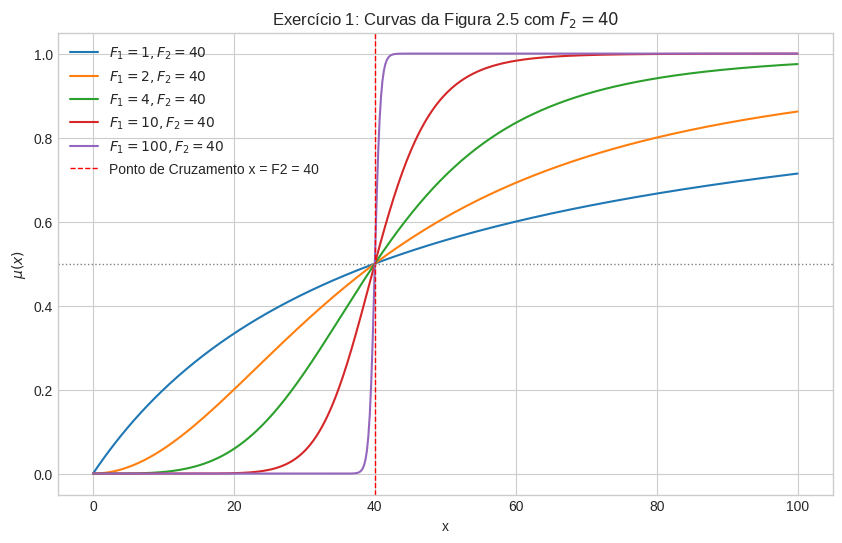

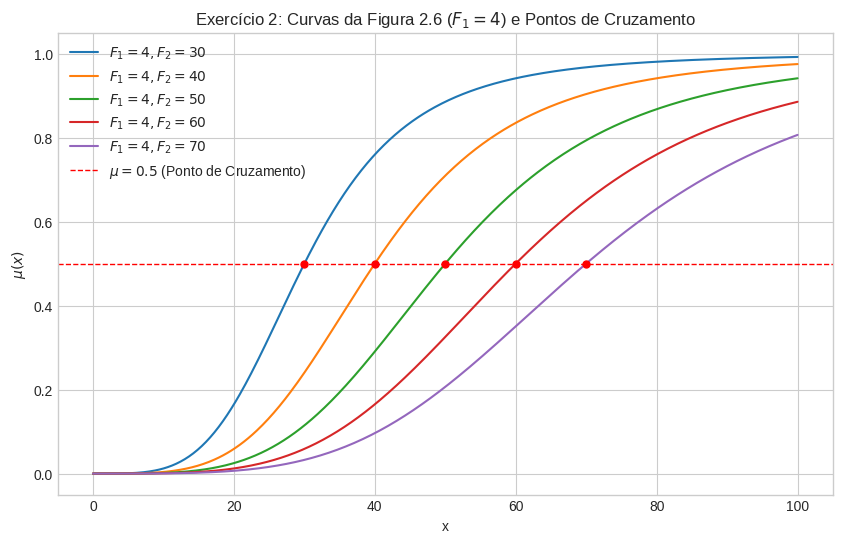

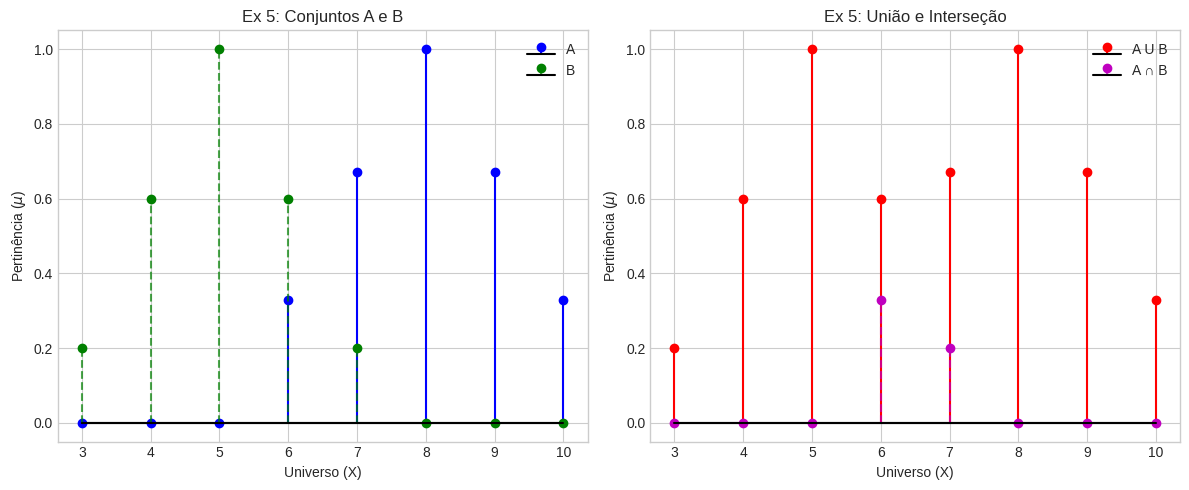

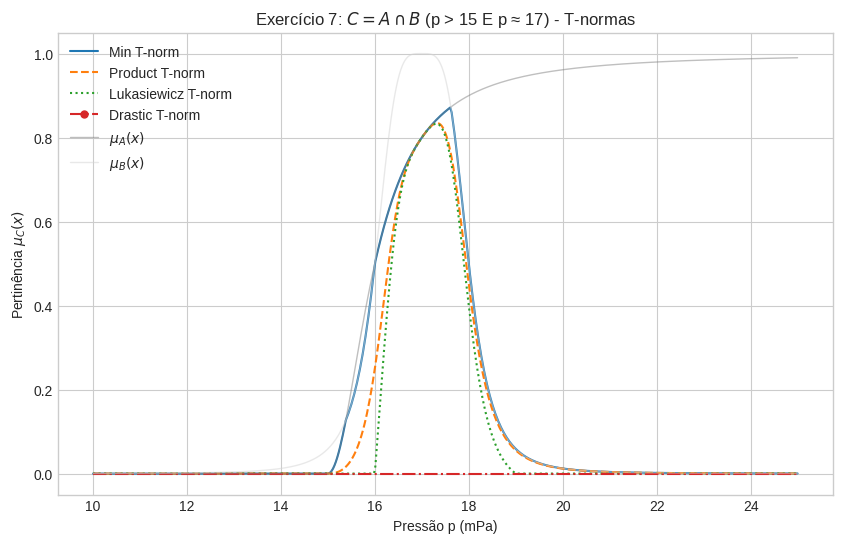

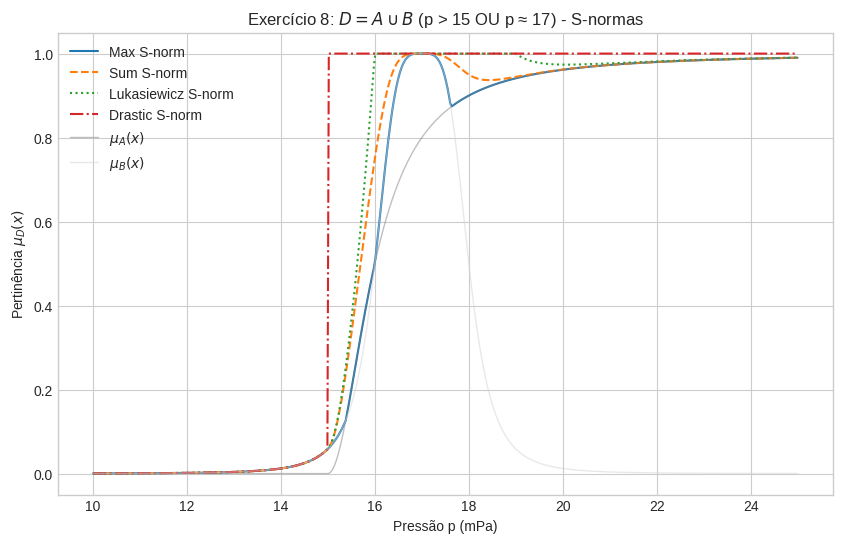

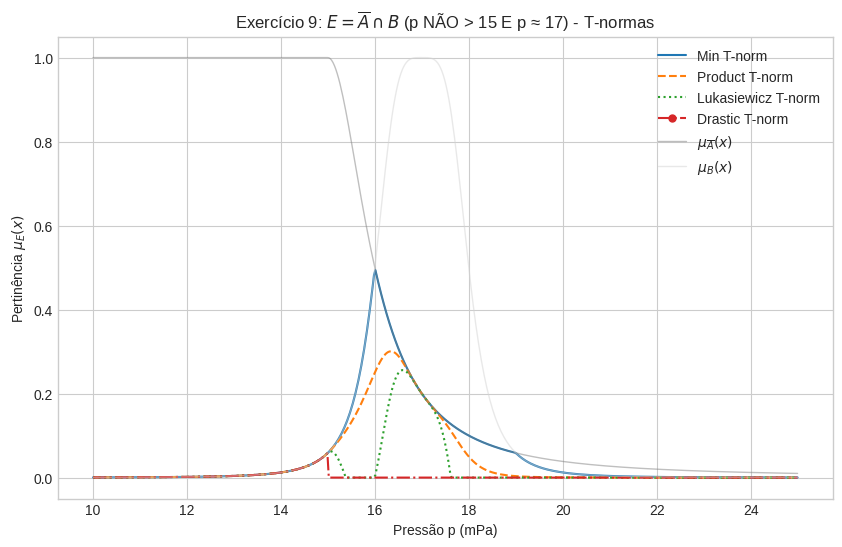

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Funções Auxiliares ---

def sigmoid_membership(x_val, F1, F2):
    """Calcula a função de pertinência sigmoidal das Figs 2.5 e 2.6."""
    ratio = x_val / (F2 + 1e-9)
    ratio[ratio <= 0] = 1e-9
    with np.errstate(over='ignore'):
        result = 1 / (1 + ratio**(-F1))
    return result

# Funções de pertinência base (Exercícios 7, 8, 9)
def mu_A_ex7(x_val):
    result = np.zeros_like(x_val, dtype=float)
    mask = x_val > 15
    x_masked = x_val[mask]
    result[mask] = 1 / (1 + (x_masked - 15 + 1e-9)**(-2))
    return result

def mu_B_ex7(x_val):
    return 1 / (1 + (x_val - 17)**4)

def mu_A_bar_ex9(x_val):
    return 1 - mu_A_ex7(x_val)

# T-normas
def t_min(a, b): return np.minimum(a, b)
def t_prod(a, b): return a * b
def t_luk(a, b): return np.maximum(0, a + b - 1)
def t_drastic(a, b, x_val, target_x_a=None, target_x_b=None):
    res = np.zeros_like(a)
    if target_x_b is not None:
        idx_b1 = np.isclose(x_val, target_x_b)
        res[idx_b1] = a[idx_b1]
    if target_x_a is not None:
        idx_a1 = np.isclose(x_val, target_x_a)
        res[idx_a1] = np.maximum(res[idx_a1], b[idx_a1])
    return res

# S-normas
def s_max(a, b): return np.maximum(a, b)
def s_sum(a, b): return a + b - a * b
def s_luk(a, b): return np.minimum(1, a + b)
def s_drastic(a, b, x_val):
    res = np.ones_like(a)
    mask_a0 = np.isclose(a, 0)
    mask_b0 = np.isclose(b, 0)
    res[mask_a0 & ~mask_b0] = b[mask_a0 & ~mask_b0]
    res[~mask_a0 & mask_b0] = a[~mask_a0 & mask_b0]
    res[mask_a0 & mask_b0] = 0
    return res

# Função para formatar conjuntos fuzzy discretos
def format_fuzzy_set(series):
    terms = []
    for index, value in series.items():
        if value > 1e-6: # Incluir elementos com pertinência maior que um pequeno limiar
            terms.append(f"{value:.2f}/{index}")
    if not terms:
        return "{}" # Empty set
    return " + ".join(terms)

# --- Configurações de Plotagem ---
plt.style.use('seaborn-v0_8-whitegrid')

# === Exercício 1 ===
print("\n## --- Exercício 1 ---")
# O que acontece com as curvas na Figura 2.5 se definirmos F2=40 e variarmos F1?
x_ex1 = np.linspace(0, 100, 500)
F2_ex1 = 40
F1_values_ex1 = [1, 2, 4, 10, 100]

plt.figure(figsize=(10, 6))
for F1 in F1_values_ex1:
    mu_vals = sigmoid_membership(x_ex1, F1, F2_ex1)
    plt.plot(x_ex1, mu_vals, label=f'$F_1={F1}, F_2={F2_ex1}$')

plt.axvline(F2_ex1, color='red', linestyle='--', linewidth=1, label=f'Ponto de Cruzamento x = F2 = {F2_ex1}')
plt.axhline(0.5, color='grey', linestyle=':', linewidth=1)
plt.title('Exercício 1: Curvas da Figura 2.5 com $F_2 = 40$')
plt.xlabel('x')
plt.ylabel('$\mu(x)$')
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.savefig("exercicio_1_F2_40.png")
print("Gráfico do Exercício 1 salvo como exercicio_1_F2_40.png")
print("Observação: As curvas são transladadas para a esquerda, centradas em x=40.")

# === Exercício 2 ===
print("\n## --- Exercício 2 ---")
# Na Figura 2.6, qual é o significado da interseção entre a linha mu=0.5 e as curvas?
x_ex2 = np.linspace(0, 100, 500)
F1_ex2 = 4
F2_values_ex2 = [30, 40, 50, 60, 70]

plt.figure(figsize=(10, 6))
for F2 in F2_values_ex2:
    mu_vals = sigmoid_membership(x_ex2, F1_ex2, F2)
    plt.plot(x_ex2, mu_vals, label=f'$F_1={F1_ex2}, F_2={F2}$')
    plt.plot(F2, 0.5, 'ro', markersize=5) # Marca a interseção

plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='$\mu = 0.5$ (Ponto de Cruzamento)')
plt.title('Exercício 2: Curvas da Figura 2.6 ($F_1 = 4$) e Pontos de Cruzamento')
plt.xlabel('x')
plt.ylabel('$\mu(x)$')
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.savefig("exercicio_2_F1_4_crossover.png")
print("Gráfico do Exercício 2 salvo como exercicio_2_F1_4_crossover.png")
print(f"Observação: A interseção com a linha mu=0.5 ocorre em x = F2 para cada curva.")

# === Exercício 5 ===
print("\n## --- Exercício 5 ---")
# Dados os conjuntos A e B. Encontrar A união B e A interseção B.
universe_ex5 = list(range(3, 11))
data_A_ex5 = {6: 0.33, 7: 0.67, 8: 1.00, 9: 0.67, 10: 0.33}
A_ex5 = pd.Series(data_A_ex5, index=universe_ex5).fillna(0)
data_B_ex5 = {3: 0.20, 4: 0.60, 5: 1.00, 6: 0.60, 7: 0.20}
B_ex5 = pd.Series(data_B_ex5, index=universe_ex5).fillna(0)

A_union_B_ex5 = pd.concat([A_ex5, B_ex5], axis=1).max(axis=1)
A_intersection_B_ex5 = pd.concat([A_ex5, B_ex5], axis=1).min(axis=1)

print("Conjunto A:", format_fuzzy_set(A_ex5))
print("Conjunto B:", format_fuzzy_set(B_ex5))
print("\n(a) União (A U B):")
print(format_fuzzy_set(A_union_B_ex5))
print("\n(b) Interseção (A ∩ B):")
print(format_fuzzy_set(A_intersection_B_ex5))

# Plot Ex 5
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
markerline_A, stemlines_A, baseline_A = plt.stem(A_ex5.index, A_ex5.values, linefmt='b-', markerfmt='bo', basefmt='k-', label='A')
markerline_B, stemlines_B, baseline_B = plt.stem(B_ex5.index, B_ex5.values, linefmt='g--', markerfmt='go', basefmt='k-', label='B')
plt.setp(stemlines_A, 'linewidth', 1.5)
plt.setp(stemlines_B, 'linewidth', 1.5, 'alpha', 0.7)
plt.ylim(-0.05, 1.05)
plt.xlabel('Universo (X)')
plt.ylabel('Pertinência ($\mu$)')
plt.title('Ex 5: Conjuntos A e B')
plt.legend()
plt.grid(True, axis='y'); plt.xticks(universe_ex5)

plt.subplot(1, 2, 2)
markerline_U, stemlines_U, baseline_U = plt.stem(A_union_B_ex5.index, A_union_B_ex5.values, linefmt='r-', markerfmt='ro', basefmt='k-', label='A U B')
markerline_I, stemlines_I, baseline_I = plt.stem(A_intersection_B_ex5.index, A_intersection_B_ex5.values, linefmt='m--', markerfmt='mo', basefmt='k-', label='A ∩ B')
plt.setp(stemlines_U, 'linewidth', 1.5)
plt.setp(stemlines_I, 'linewidth', 1.5, 'alpha', 0.7)
plt.ylim(-0.05, 1.05)
plt.xlabel('Universo (X)')
plt.ylabel('Pertinência ($\mu$)')
plt.title('Ex 5: União e Interseção')
plt.legend()
plt.grid(True, axis='y'); plt.xticks(universe_ex5)

plt.tight_layout()
plt.savefig("exercicio_5_plots.png")
print("\nGráficos do Exercício 5 salvos como exercicio_5_plots.png")

# === Exercício 6 ===
print("\n## --- Exercício 6 ---")
print("Este exercício pede sinônimos textuais para 'max' e 'min'.")
print("(a) Sinônimos/termos para max: v, União (U), OU (OR), S-norma, T-conorma")
print("(b) Sinônimos/termos para min: ^, Interseção (∩), E (AND), T-norma")

# === Exercício 7 ===
print("\n## --- Exercício 7 ---")
# Encontrar C = A AND B usando 4 T-normas.
x_ex7 = np.linspace(10, 25, 500) # Foco na região de interesse
mu_A_vals_ex7 = mu_A_ex7(x_ex7)
mu_B_vals_ex7 = mu_B_ex7(x_ex7)

mu_C_min_vals = t_min(mu_A_vals_ex7, mu_B_vals_ex7)
mu_C_prod_vals = t_prod(mu_A_vals_ex7, mu_B_vals_ex7)
mu_C_luk_vals = t_luk(mu_A_vals_ex7, mu_B_vals_ex7)
mu_C_drastic_vals = np.zeros_like(x_ex7)
idx_17 = np.isclose(x_ex7, 17)
mu_A_at_17 = mu_A_ex7(np.array([17.]))[0] # Calculate only at 17
mu_C_drastic_vals[idx_17] = mu_A_at_17

plt.figure(figsize=(10, 6))
plt.plot(x_ex7, mu_C_min_vals, label='Min T-norm', linestyle='-')
plt.plot(x_ex7, mu_C_prod_vals, label='Product T-norm', linestyle='--')
plt.plot(x_ex7, mu_C_luk_vals, label='Lukasiewicz T-norm', linestyle=':')
plt.plot(x_ex7, mu_C_drastic_vals, label='Drastic T-norm', linestyle='-.', marker='o', markersize=5, markevery=idx_17)
plt.plot(x_ex7, mu_A_vals_ex7, label='$\mu_A(x)$', color='grey', alpha=0.5, linewidth=1)
plt.plot(x_ex7, mu_B_vals_ex7, label='$\mu_B(x)$', color='lightgrey', alpha=0.5, linewidth=1)
plt.title('Exercício 7: $C = A \cap B$ (p > 15 E p ≈ 17) - T-normas')
plt.xlabel('Pressão p (mPa)')
plt.ylabel('Pertinência $\mu_C(x)$')
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.savefig("exercicio_7_t_normas.png")
print("Gráfico do Exercício 7 salvo como exercicio_7_t_normas.png")

# === Exercício 8 ===
print("\n## --- Exercício 8 ---")
# Encontrar D = A OR B usando 4 S-normas.
x_ex8 = np.linspace(10, 25, 500)
mu_A_vals_ex8 = mu_A_ex7(x_ex8) # Reusa funções do ex7
mu_B_vals_ex8 = mu_B_ex7(x_ex8)

mu_D_max_vals = s_max(mu_A_vals_ex8, mu_B_vals_ex8)
mu_D_sum_vals = s_sum(mu_A_vals_ex8, mu_B_vals_ex8)
mu_D_luk_vals = s_luk(mu_A_vals_ex8, mu_B_vals_ex8)
# Drastic S-norm for A OR B
mu_D_drastic_vals = np.ones_like(x_ex8)
mask_le_15_D = x_ex8 <= 15
mu_D_drastic_vals[mask_le_15_D] = mu_B_vals_ex8[mask_le_15_D]

plt.figure(figsize=(10, 6))
plt.plot(x_ex8, mu_D_max_vals, label='Max S-norm', linestyle='-')
plt.plot(x_ex8, mu_D_sum_vals, label='Sum S-norm', linestyle='--')
plt.plot(x_ex8, mu_D_luk_vals, label='Lukasiewicz S-norm', linestyle=':')
plt.plot(x_ex8, mu_D_drastic_vals, label='Drastic S-norm', linestyle='-.')
plt.plot(x_ex8, mu_A_vals_ex8, label='$\mu_A(x)$', color='grey', alpha=0.5, linewidth=1)
plt.plot(x_ex8, mu_B_vals_ex8, label='$\mu_B(x)$', color='lightgrey', alpha=0.5, linewidth=1)
plt.title('Exercício 8: $D = A \cup B$ (p > 15 OU p ≈ 17) - S-normas')
plt.xlabel('Pressão p (mPa)')
plt.ylabel('Pertinência $\mu_D(x)$')
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.savefig("exercicio_8_s_normas.png")
print("Gráfico do Exercício 8 salvo como exercicio_8_s_normas.png")

# === Exercício 9 ===
print("\n## --- Exercício 9 ---")
# Encontrar E = (NOT A) AND B usando 4 T-normas.
x_ex9 = np.linspace(10, 25, 500)
mu_A_bar_vals_ex9 = mu_A_bar_ex9(x_ex9)
mu_B_vals_ex9 = mu_B_ex7(x_ex9) # Reusa mu_B

mu_E_min_vals = t_min(mu_A_bar_vals_ex9, mu_B_vals_ex9)
mu_E_prod_vals = t_prod(mu_A_bar_vals_ex9, mu_B_vals_ex9)
mu_E_luk_vals = t_luk(mu_A_bar_vals_ex9, mu_B_vals_ex9)
# Drastic T-norm for A_bar AND B
mu_E_drastic_vals = np.zeros_like(x_ex9)
mask_le_15_E = x_ex9 <= 15
mu_E_drastic_vals[mask_le_15_E] = mu_B_vals_ex9[mask_le_15_E]
idx_17_E = np.isclose(x_ex9, 17)
mu_A_bar_at_17 = mu_A_bar_ex9(np.array([17.]))[0]
mu_E_drastic_vals[idx_17_E] = np.maximum(mu_E_drastic_vals[idx_17_E], mu_A_bar_at_17)

plt.figure(figsize=(10, 6))
plt.plot(x_ex9, mu_E_min_vals, label='Min T-norm', linestyle='-')
plt.plot(x_ex9, mu_E_prod_vals, label='Product T-norm', linestyle='--')
plt.plot(x_ex9, mu_E_luk_vals, label='Lukasiewicz T-norm', linestyle=':')
plt.plot(x_ex9, mu_E_drastic_vals, label='Drastic T-norm', linestyle='-.', marker='o', markersize=5, markevery=idx_17_E)
plt.plot(x_ex9, mu_A_bar_vals_ex9, label='$\mu_{\overline{A}}(x)$', color='grey', alpha=0.5, linewidth=1)
plt.plot(x_ex9, mu_B_vals_ex9, label='$\mu_B(x)$', color='lightgrey', alpha=0.5, linewidth=1)
plt.title('Exercício 9: $E = \overline{A} \cap B$ (p NÃO > 15 E p ≈ 17) - T-normas')
plt.xlabel('Pressão p (mPa)')
plt.ylabel('Pertinência $\mu_E(x)$')
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True)
plt.savefig("exercicio_9_t_normas.png")
print("Gráfico do Exercício 9 salvo como exercicio_9_t_normas.png")

print("\n--- Fim de Todos os Exercícios ---")